In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [11]:
import utils.network.network8 as model
from utils.metrics import metric

In [12]:
net = model.MyLstmModel()

In [13]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='categorical_crossentropy', metrics=metric())

In [14]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network8-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [15]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

l_fp: 1189.0000 - val_tn: 289203.0000 - val_fn: 12775.0000 - val_categorical_accuracy: 0.9712 - val_categorical_crossentropy: 0.1204 - val_precision: 0.9911 - val_recall: 0.9120 - val_auc: 0.9972
Epoch 5/40
662/662 [==============================] - 13s 19ms/step - loss: 0.7009 - acc: 0.0000e+00 - tp: 315716.0000 - fp: 4461.0000 - tn: 673115.0000 - fn: 23072.0000 - categorical_accuracy: 0.9695 - categorical_crossentropy: 0.1113 - precision: 0.9861 - recall: 0.9319 - auc: 0.9968 - val_loss: 0.7443 - val_acc: 0.0000e+00 - val_tp: 129409.0000 - val_fp: 1337.0000 - val_tn: 289055.0000 - val_fn: 15787.0000 - val_categorical_accuracy: 0.9566 - val_categorical_crossentropy: 0.1145 - val_precision: 0.9898 - val_recall: 0.8913 - val_auc: 0.9968
Epoch 6/40
662/662 [==============================] - 13s 19ms/step - loss: 0.7072 - acc: 0.0000e+00 - tp: 316049.0000 - fp: 4633.0000 - tn: 672943.0000 - fn: 22739.0000 - categorical_accuracy: 0.9693 - categorical_crossentropy: 0.1124 - precision: 0.985

In [16]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  121051.0
TruePositives result:  74255.0
FalseNegatives result:  1456.0
FalsePositives result:  10660.0
Recall result:  0.980769
Precision result:  0.8744627


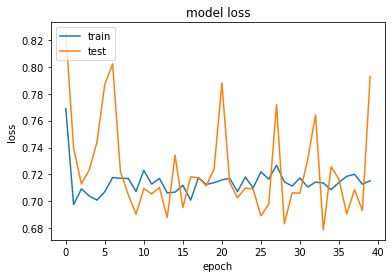

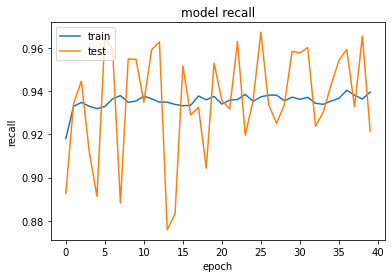

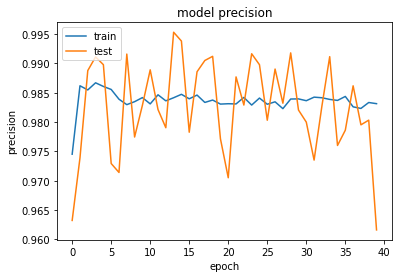

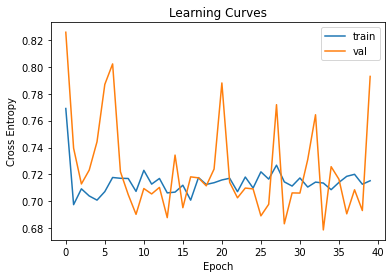

In [17]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)
fig.cross_entropy_graph(model_,dir_name)